In [25]:
import warnings
from skfuzzy import control as ctrl 
import skfuzzy as fuzz
import numpy as np

%matplotlib inline
warnings.filterwarnings('ignore')

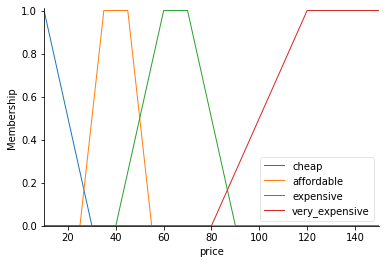

In [26]:
price = ctrl.Antecedent(np.arange(10, 151, 1), 'price')

price['cheap'] = fuzz.trimf(price.universe, [10, 10, 30])
price['affordable'] = fuzz.trapmf(price.universe, [25, 35, 45, 55])
price['expensive'] = fuzz.trapmf(price.universe, [40, 60, 70, 90])
price['very_expensive'] = fuzz.trapmf(price.universe, [80, 120, 150, 150])

price.view()


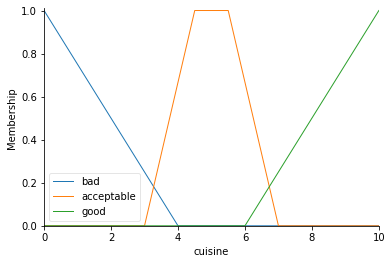

In [27]:
cuisine = ctrl.Antecedent(np.arange(0, 10.5, 0.5), 'cuisine')

cuisine['bad'] = fuzz.trimf(cuisine.universe, [0, 0, 4])
cuisine['acceptable'] = fuzz.trapmf(cuisine.universe, [3, 4.5, 5.5, 7])
cuisine['good'] = fuzz.trimf(cuisine.universe, [6, 10, 10])

cuisine.view()


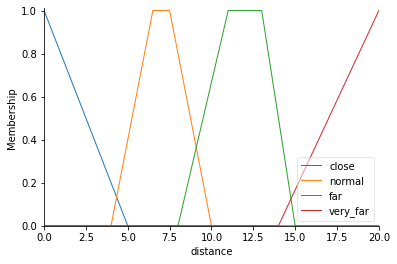

In [28]:
distance = ctrl.Antecedent(np.arange(0, 20.5, 0.5), 'distance')

distance['close'] = fuzz.trimf(distance.universe, [0, 0, 5])
distance['normal'] = fuzz.trapmf(distance.universe, [4, 6.5, 7.5, 10])
distance['far'] = fuzz.trapmf(distance.universe, [8, 11, 13, 15])
distance['very_far'] = fuzz.trimf(distance.universe, [14, 20, 20])

distance.view()


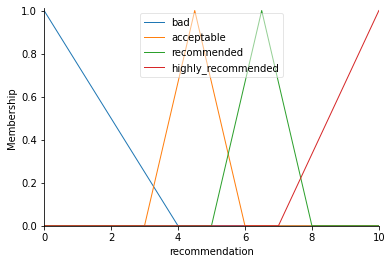

In [29]:
recommendation = ctrl.Consequent(np.arange(0, 10.5, 0.5), 'recommendation')

recommendation['bad'] = fuzz.trimf(recommendation.universe, [0, 0, 4])
recommendation['acceptable'] = fuzz.trimf(recommendation.universe, [3, 4.5, 6])
recommendation['recommended'] = fuzz.trimf(recommendation.universe, [5, 6.5, 8])
recommendation['highly_recommended'] = fuzz.trimf(recommendation.universe, [7, 10, 10])

recommendation.view()


In [30]:
import pandas as pd
import itertools
import os.path

prices = ['cheap','affordable','expensive','very_expensive'] 
cuisines = ['bad','acceptable','good']
distances = ['close','normal','far','very_far']
recommendations = ['bad','acceptable','recommended','highly_recommended']

filename = 'csv_files/recommendations.csv'

if os.path.isfile(filename):
    df = pd.read_csv(filename)
else:
    df = pd.DataFrame(list(itertools.product(prices, cuisines, distances)), columns=['Price','Cuisine','Distance'])
df['Combination'] = df['Price'] + ' price, ' + df['Cuisine'] + ' cuisine, ' + df['Distance'] + ' distance'
df.shape

(64, 4)

In [31]:
df.to_csv(filename,index=False)

In [32]:
df.shape

(64, 4)

In [33]:
recommendation_ctrl = ctrl.ControlSystem([
    ctrl.Rule(  # 1
        price['cheap'] &
        (cuisine['good']) &
        ~distance['very_far'], recommendation['highly_recommended']
    ),

    ctrl.Rule(  # 2
        price['cheap'] &
        (cuisine['good']) &
        distance['very_far'], recommendation['recommended']
    ),

    ctrl.Rule(  # 3
        price['cheap'] &
        (cuisine['acceptable']) &
        distance['close'], recommendation['recommended']
    ),

    ctrl.Rule(  # 4
        price['cheap'] &
        (cuisine['acceptable']) &
        ~distance['close'], recommendation['acceptable']
    ),

    ctrl.Rule(  # 5 6 11 16
        (price['cheap'] & cuisine['bad']) |
        (~price['cheap'] & ~cuisine['good']), recommendation['bad']
    ),


    ctrl.Rule(  # 7
        price['affordable'] &
        (cuisine['acceptable']) &
        (distance['close'] | distance['normal']), recommendation['acceptable']
    ),

    ctrl.Rule(  # 8
        price['affordable'] &
        (cuisine['acceptable']) &
        ~(distance['close'] | distance['normal']), recommendation['bad']
    ),

    ctrl.Rule(  # 9
        price['affordable'] &
        (cuisine['good']) &
        (distance['close'] | distance['normal']), recommendation['recommended']
    ),

    ctrl.Rule(  # 10
        price['affordable'] &
        (cuisine['good']) &
        (distance['close'] | distance['normal']), recommendation['acceptable']
    ),

    ctrl.Rule(  # 12
        price['expensive'] &
        (cuisine['good']) &
        (distance['close']), recommendation['recommended']
    ),

    ctrl.Rule(  # 13
        price['expensive'] &
        (cuisine['good']) &
        (distance['normal']), recommendation['acceptable']
    ),

    ctrl.Rule(  # 14
        price['expensive'] &
        (cuisine['good']) &
        ~(distance['close'] | distance['normal']), recommendation['bad']
    )
])


In [34]:
prices = ['cheap', 'affordable', 'expensive', 'very_expensive']
cuisines = ['bad', 'acceptable', 'good']
distances = ['close', 'normal', 'far', 'very_far']
recommendations = ['bad', 'acceptable', 'recommended', 'highly_recommended']


In [35]:
recommender = ctrl.ControlSystemSimulation(recommendation_ctrl)

In [46]:
def show_recommendation(c, p, d):
    recommender.input['cuisine'] = c
    recommender.input['price'] = p
    recommender.input['distance'] = d

    recommender.compute()
    print(recommender.output['recommendation'])
    recommendation.view(sim=recommender)


In [49]:
restaurants = pd.read_csv('csv_files/restaurants.csv')

my_restaurants = restaurants.iloc[0:3]
my_restaurants


,restaurant,price,cuisine,distance
0,"King, DuBuque and Erdman",148200,5.5,4.2
1,"Kilback, Robel and Wisozk",84200,1.9,10.4
2,Feil Group,44100,9.5,0.7


King, DuBuque and Erdman
1.3333333333333335
Kilback, Robel and Wisozk
1.3333333333333335
Feil Group
1.8777777777777778


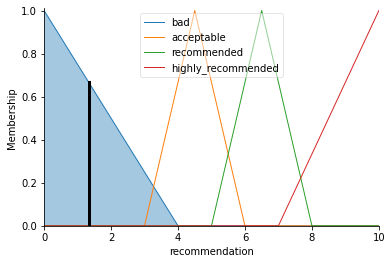

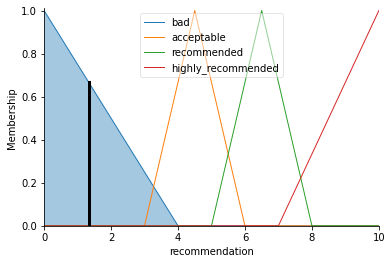

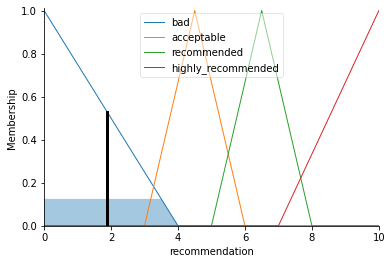

In [51]:
for _, res in my_restaurants.iterrows():
    print(res['restaurant'])
    show_recommendation(res['cuisine'], res['price'], res['distance'])
